<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/Wine-Reviews/Wine_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
data = pd.read_csv("winemag-data-130k-v2.csv")

# examine the structure of the data frame
print("\nContents of coaches data frame ---------------")

# print the first five rows of the data frame
print(pd.DataFrame.head(data))
data = pd.DataFrame(data)


Contents of coaches data frame ---------------
   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1          

In [0]:
# Data cleaning

data = data.drop(columns=['Unnamed: 0'])
data = data.fillna(0)

In [6]:
# Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41265 entries, 0 to 41264
Data columns (total 13 columns):
country                  41265 non-null object
description              41265 non-null object
designation              41265 non-null object
points                   41265 non-null int64
price                    41265 non-null float64
province                 41265 non-null object
region_1                 41265 non-null object
region_2                 41265 non-null object
taster_name              41265 non-null object
taster_twitter_handle    41265 non-null object
title                    41265 non-null object
variety                  41265 non-null object
winery                   41265 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 4.1+ MB


In [7]:
data.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 0, 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encoding varieties

lb_make = LabelEncoder()
data["variety_code"] = lb_make.fit_transform(data["variety"].astype(str))
data[["variety", "variety_code"]].head(11)

,variety,variety_code
0,White Blend,512
1,Portuguese Red,332
2,Pinot Gris,319
3,Riesling,356
4,Pinot Noir,324
5,Tempranillo-Merlot,439
6,Frappato,134
7,Gewürztraminer,150
8,Gewürztraminer,150
9,Pinot Gris,319


In [9]:
# Label encoding winery

lb_make = LabelEncoder()
data["winery_code"] = lb_make.fit_transform(data["winery"].astype(str))
data[["winery", "winery_code"]].head(11)

,winery,winery_code
0,Nicosia,7824
1,Quinta dos Avidagos,8760
2,Rainstorm,8804
3,St. Julian,9756
4,Sweet Cheeks,9922
5,Tandem,9976
6,Terre di Giurfo,10195
7,Trimbach,10443
8,Heinz Eifel,5614
9,Jean-Baptiste Adam,6028


In [10]:
# Label encoding region_1

lb_make = LabelEncoder()
data["region_1_code"] = lb_make.fit_transform(data["region_1"].astype(str))
data[["region_1", "region_1_code"]].head(11)

,region_1,region_1_code
0,Etna,354
1,0,0
2,Willamette Valley,1012
3,Lake Michigan Shore,457
4,Willamette Valley,1012
5,Navarra,621
6,Vittoria,1000
7,Alsace,18
8,0,0
9,Alsace,18


In [11]:
# Label encoding country

lb_make = LabelEncoder()
data["country_code"] = lb_make.fit_transform(data["country"].astype(str))
data[["country", "country_code"]].head(11)

,country,country_code
0,Italy,21
1,Portugal,30
2,US,39
3,US,39
4,US,39
5,Spain,36
6,Italy,21
7,France,14
8,Germany,16
9,France,14


In [12]:
# Label encoding title

lb_make = LabelEncoder()
data["title_code"] = lb_make.fit_transform(data["title"].astype(str))
data[["title", "title_code"]].head(11)

,title,title_code
0,Nicosia 2013 Vulkà Bianco (Etna),26940
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),30245
2,Rainstorm 2013 Pinot Gris (Willamette Valley),30404
3,St. Julian 2013 Reserve Late Harvest Riesling ...,34093
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,34732
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,34994
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),35746
7,Trimbach 2012 Gewurztraminer (Alsace),36650
8,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,18443
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,20034


In [13]:
# Label encoding province

lb_make = LabelEncoder()
data["province_code"] = lb_make.fit_transform(data["province"].astype(str))
data[["province", "province_code"]].head(11)

,province,province_code
0,Sicily & Sardinia,277
1,Douro,86
2,Oregon,220
3,Michigan,175
4,Oregon,220
5,Northern Spain,214
6,Sicily & Sardinia,277
7,Alsace,10
8,Rheinhessen,255
9,Alsace,10


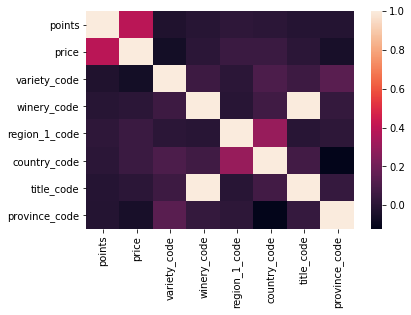

In [14]:
# Visualize correlations
corr = data.corr()
 
# Heatmap
sns.heatmap(corr)

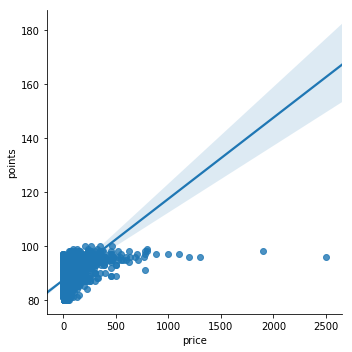

In [15]:
# relationship between price and points
sns.lmplot(x='price', y='points', data=data)

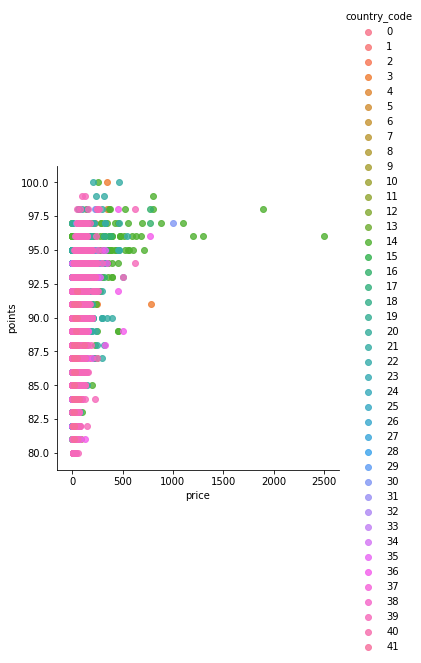

In [16]:

sns.lmplot(x='price', y='points', data=data,
           fit_reg=False, # No regression line
           hue='country_code')   # Color by country

In [22]:
data.loc[data['country_code'] == 14]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_code,winery_code,region_1_code,country_code,title_code,province_code
7,France,This dry and restrained wine offers spice in p...,0,87,24.0,Alsace,Alsace,0,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,150,10443,18,14,36650,10
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,0,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,319,6028,18,14,20034,10
11,France,"This is a dry wine, very spicy, with a tight, ...",0,87,30.0,Alsace,Alsace,0,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,150,6693,18,14,22690,10
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,0.0,Beaujolais,Beaujolais-Villages,0,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,142,4217,75,14,13207,26
42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,0,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,142,5636,71,14,18573,26
49,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,0,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air,142,10763,114,14,37727,26
53,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,15.0,Bordeaux,Bordeaux Blanc,0,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours,43,2939,99,14,9360,33
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,0,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,88,9072,164,14,31501,63
65,France,"From the warm 2015 vintage, this is a soft and...",0,86,24.0,Burgundy,Chablis,0,Roger Voss,@vossroger,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,90,9580,158,14,33445,42
66,France,"This soft, rounded wine is ripe with generous ...",0,86,15.0,Burgundy,Mâcon-Milly Lamartine,0,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,90,10768,602,14,37771,42


In [20]:
data.loc[data['price'] > 1000]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_code,winery_code,region_1_code,country_code,title_code,province_code
1558,France,"A massive wine for Margaux, packed with tannin...",0,98,1900.0,Bordeaux,Margaux,0,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,42,2538,507,14,8437,33
1566,France,"Such a generous and ripe wine, with a dark cor...",0,97,1100.0,Bordeaux,Pessac-Léognan,0,Roger Voss,@vossroger,Château La Mission Haut-Brion 2009 Pessac-Léo...,Bordeaux-style Red Blend,Château La Mission Haut-Brion,42,2413,677,14,8129,33
1571,France,"Solid, very structured, packed with dense and ...",0,96,1200.0,Bordeaux,Pessac-Léognan,0,Roger Voss,@vossroger,Château Haut-Brion 2009 Pessac-Léognan,Bordeaux-style Red Blend,Château Haut-Brion,42,2358,677,14,8036,33
1575,France,"The purest Cabernet Sauvignon fruit, with dark...",0,96,1300.0,Bordeaux,Pauillac,0,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild,42,2580,668,14,8512,33
15840,France,The wine is a velvet glove in an iron fist. Th...,0,96,2500.0,Bordeaux,Pomerol,0,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,42,2652,687,14,8682,33


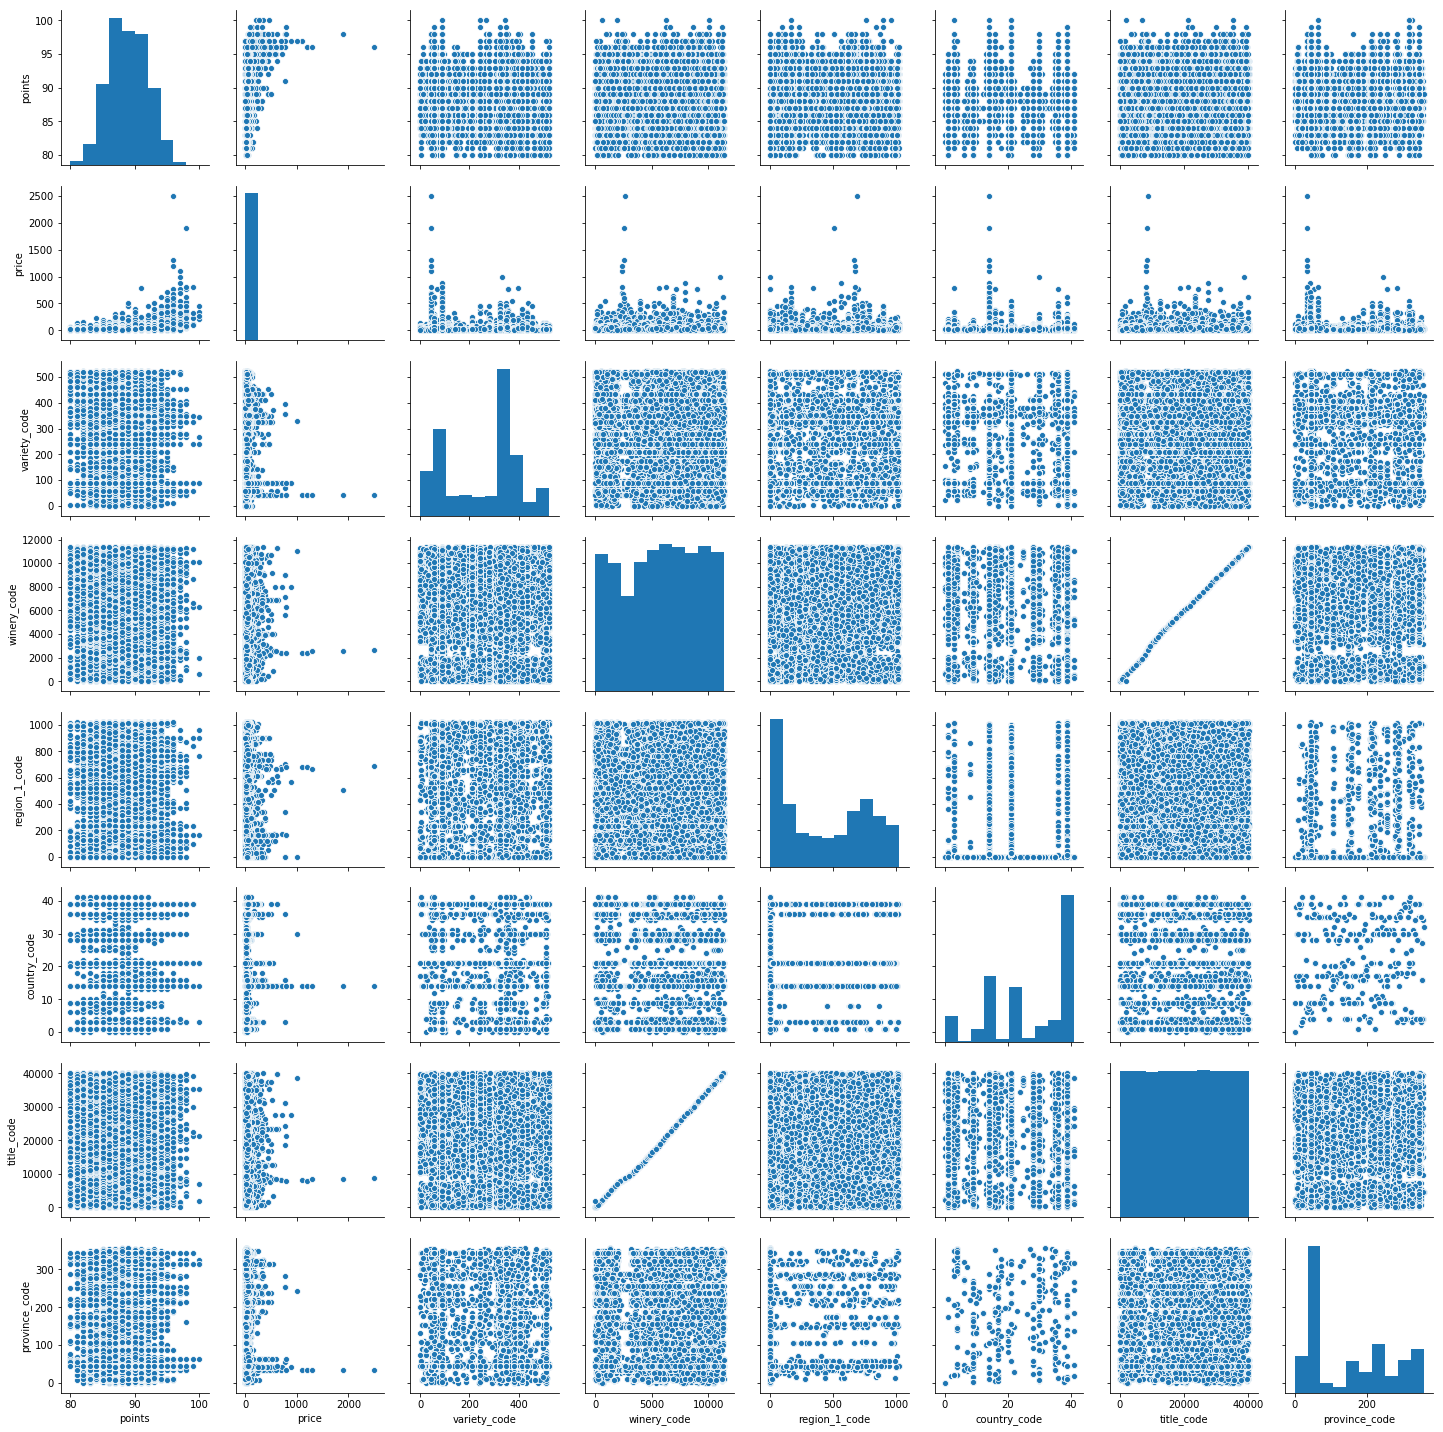

In [17]:
sns.pairplot(data)

In [0]:
X = np.column_stack((data['price'], data['region_1_code'], data['country_code']))
y = data['points']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#R-squared too low

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7776.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:25:28   Log-Likelihood:            -6.5502e+05
No. Observations:              129971   AIC:                         1.310e+06
Df Residuals:                  129967   BIC:                         1.310e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -426.4999      3.024   -141.028      0.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


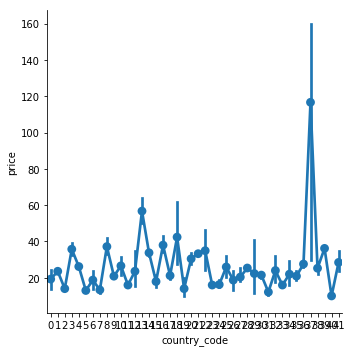

In [23]:
sns.factorplot(x='country_code', y='price', data=data)

In [25]:
results = ols('points ~ C(country_code)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     53.81
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:49:19   Log-Likelihood:            -1.0291e+05
No. Observations:               41265   AIC:                         2.059e+05
Df Residuals:                   41223   BIC:                         2.063e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                87.7222      0.691    126.974      0.000      86.368      89.076
C(country_code)[T.1]     -1.0238      0.696     -1.471      0.141      -2.388       0.340
C(country_code)[T.2]     -0.7222      3.011     -0.240      0.810      -6.625       5.180
C(country_code)[T.3]      1.0268      0.699      1.468      0.142      -0.344       2.397
C(country_code)[T.4]      2.3988      0.697      3.443      0.001       1.033       3.764
C(country_code)[T.5]     -2.7222      3.011     -0.904      0.366      -8.625       3.180
C(country_code)[T.6]     -3.5483      0.922     -3.847      0.000      -5.356      -1.740
C(country_code)[T.7]      0.1349      0.826      0.163      0.870      -1.484       1.753
C(country_code)[T.8]      1.7009      0.766      2.219      0.026       0.199       3.203
C(country_code)[T.9]     -1.0840      0.695     -1.559      0.119      -2.447       0.279
C(country_code)[T.10]    -0.1889      0.874     -0.216      0.829      -1.902       1.524
C(country_code)[T.11]    -2.2222      1.620     -1.372      0.170      -5.398       0.953
C(country_code)[T.12]    -1.1222      1.482     -0.757      0.449      -4.026       1.782
C(country_code)[T.13]     3.7778      1.092      3.458      0.001       1.637       5.919
C(country_code)[T.14]     1.1132      0.692      1.609      0.108      -0.243       2.469
C(country_code)[T.15]    -0.3376      0.899     -0.376      0.707      -2.099       1.424
C(country_code)[T.16]     2.0656      0.700      2.951      0.003       0.694       3.438
C(country_code)[T.17]    -0.6014      0.731     -0.822      0.411      -2.035       0.832
C(country_code)[T.18]     1.3318      0.842      1.581      0.114      -0.319       2.983
C(country_code)[T.19]     2.9444      1.828      1.611      0.107      -0.638       6.527
C(country_code)[T.20]     0.1869      0.728      0.257      0.797      -1.239       1.613
C(country_code)[T.21]     0.7657      0.692      1.107      0.268      -0.590       2.122
C(country_code)[T.22]     0.5855      1.067      0.549      0.583      -1.506       2.677
C(country_code)[T.23]     1.2778      3.011      0.424      0.671      -4.625       7.180
C(country_code)[T.24]     0.7778      1.620      0.480      0.631      -2.398       3.953
C(country_code)[T.25]    -2.0404      0.932     -2.190      0.029      -3.866      -0.215
C(country_code)[T.26]    -0.8889      0.977     -0.910      0.363      -2.804       1.026
C(country_code)[T.27]     1.6778      1.482      1.132      0.258      -1.226       4.582
C(country_code)[T.28]     0.3784      0.704      0.538      0.591      -1.001       1.757
C(country_code)[T.29]    -3.8889      1.382     -2.814      0.005      -6.597      -1.181
C(country_code)[T.30]     0.4679      0.694      0.674      0.500      -0.893       1.829
C(country_code)[T.31]  